<a href="https://colab.research.google.com/github/isamubas/DMSL-/blob/main/time_series_model_predicting_the_demand_and_supply_of_Almonds%2C_Shelled_Basis_(Agric_product).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#import all libralies
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [10]:
#connect google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df= pd.read_csv('/content/drive/MyDrive/psd_alldata.csv')
df.head(30)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,20,Beginning Stocks,21,(MT),0.0
1,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,125,Domestic Consumption,21,(MT),0.0
2,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,176,Ending Stocks,21,(MT),0.0
3,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,88,Exports,21,(MT),0.0
4,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,57,Imports,21,(MT),0.0
5,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,28,Production,21,(MT),0.0
6,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,178,Total Distribution,21,(MT),0.0
7,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,86,Total Supply,21,(MT),0.0
8,577400,"Almonds, Shelled Basis",AG,Algeria,2001,2010,10,20,Beginning Stocks,21,(MT),0.0
9,577400,"Almonds, Shelled Basis",AG,Algeria,2001,2010,10,125,Domestic Consumption,21,(MT),300.0


In [12]:
#check for missing values
display(df.isnull().sum())

,0
Commodity_Code,0
Commodity_Description,0
Country_Code,1004
Country_Name,0
Market_Year,0
Calendar_Year,0
Month,0
Attribute_ID,0
Attribute_Description,0
Unit_ID,0


In [13]:
#so we have checked the number of missing values but, so basically it can be dropped if the number of missing values is smaller compared to the data set. we just need to get the whole picture of the information of the data set above
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893873 entries, 0 to 1893872
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Commodity_Code         int64  
 1   Commodity_Description  object 
 2   Country_Code           object 
 3   Country_Name           object 
 4   Market_Year            int64  
 5   Calendar_Year          int64  
 6   Month                  int64  
 7   Attribute_ID           int64  
 8   Attribute_Description  object 
 9   Unit_ID                int64  
 10  Unit_Description       object 
 11  Value                  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 173.4+ MB


None

In [16]:
#so next we are handling the missing values
df.dropna(subset=['Country_Code'], inplace=True)

In [17]:
#so to be sure of the we can verify if the null values are handled, and its done in this way
print (df.isnull().sum())

Commodity_Code           0
Commodity_Description    0
Country_Code             0
Country_Name             0
Market_Year              0
Calendar_Year            0
Month                    0
Attribute_ID             0
Attribute_Description    0
Unit_ID                  0
Unit_Description         0
Value                    0
dtype: int64


In [20]:
# so to find out our number of unique values we use
df.nunique()

,0
Commodity_Code,63
Commodity_Description,63
Country_Code,212
Country_Name,212
Market_Year,62
Calendar_Year,61
Month,13
Attribute_ID,71
Attribute_Description,71
Unit_ID,11


In [22]:
#filter for Almonds,shelled Basis
almonds_df = df[df['Commodity_Description'] == 'Almonds, Shelled Basis'].copy()
#next filter for attributes related to demand and supply
demand_supply_attributes = [ 'Production', 'Imports','Exports','Domestic Consumption', 'Total Supply']
almonds_df = almonds_df[almonds_df['Attribute_Description'].isin(demand_supply_attributes)].copy()


In [25]:
#display the first rows of the filtered DataFrame
print("Filtered DataFrame (Almonds, Shelled Basis - Demand/Supply Attributes):")
display(almonds_df.head(50))

Filtered DataFrame (Almonds, Shelled Basis - Demand/Supply Attributes):


,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
1,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,125,Domestic Consumption,21,(MT),0.0
3,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,88,Exports,21,(MT),0.0
4,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,57,Imports,21,(MT),0.0
5,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,28,Production,21,(MT),0.0
7,577400,"Almonds, Shelled Basis",AF,Afghanistan,2010,2018,10,86,Total Supply,21,(MT),0.0
9,577400,"Almonds, Shelled Basis",AG,Algeria,2001,2010,10,125,Domestic Consumption,21,(MT),300.0
11,577400,"Almonds, Shelled Basis",AG,Algeria,2001,2010,10,88,Exports,21,(MT),0.0
12,577400,"Almonds, Shelled Basis",AG,Algeria,2001,2010,10,57,Imports,21,(MT),300.0
13,577400,"Almonds, Shelled Basis",AG,Algeria,2001,2010,10,28,Production,21,(MT),0.0
15,577400,"Almonds, Shelled Basis",AG,Algeria,2001,2010,10,86,Total Supply,21,(MT),300.0


In [26]:
#check for the shape of the filtered data frame
print("\nShape of the filtered DataFrame:")
display(almonds_df.shape)


Shape of the filtered DataFrame:


(4975, 12)

In [27]:
#don't forget to describe it again before going to the exploratory Data analysis
display(almonds_df.describe())

,Commodity_Code,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Value
count,4975.0,4975.000000,4975.000000,4975.000000,4975.000000,4975.0,4.975000e+03
mean,577400.0,2002.901508,2007.769849,7.363819,76.800000,21.0,2.485325e+04
std,0.0,15.024118,16.496100,4.341001,32.581795,0.0,9.709663e+04
min,577400.0,1960.000000,1961.000000,0.000000,28.000000,21.0,0.000000e+00
25%,577400.0,1999.000000,2001.000000,0.000000,57.000000,21.0,0.000000e+00
50%,577400.0,2007.000000,2014.000000,10.000000,86.000000,21.0,2.000000e+03
75%,577400.0,2014.000000,2020.000000,10.000000,88.000000,21.0,1.100000e+04
max,577400.0,2020.000000,2020.000000,11.000000,125.000000,21.0,1.574942e+06


In [32]:
# from the observation above with a standard deviation of zero there uis a perfect consistency and therfore nothing to predict since its as straight line as you will see in our explaratory data analysis.
# this wouldn't be useful at all in building a machine learning model, but lets illustrate
#we will first aggregate data by year and attribute to get total value per year for each attribute
almonds_yearly_trends = almonds_df.groupby(['Calendar_Year', 'Attribute_Description'])['Value'].sum().reset_index()

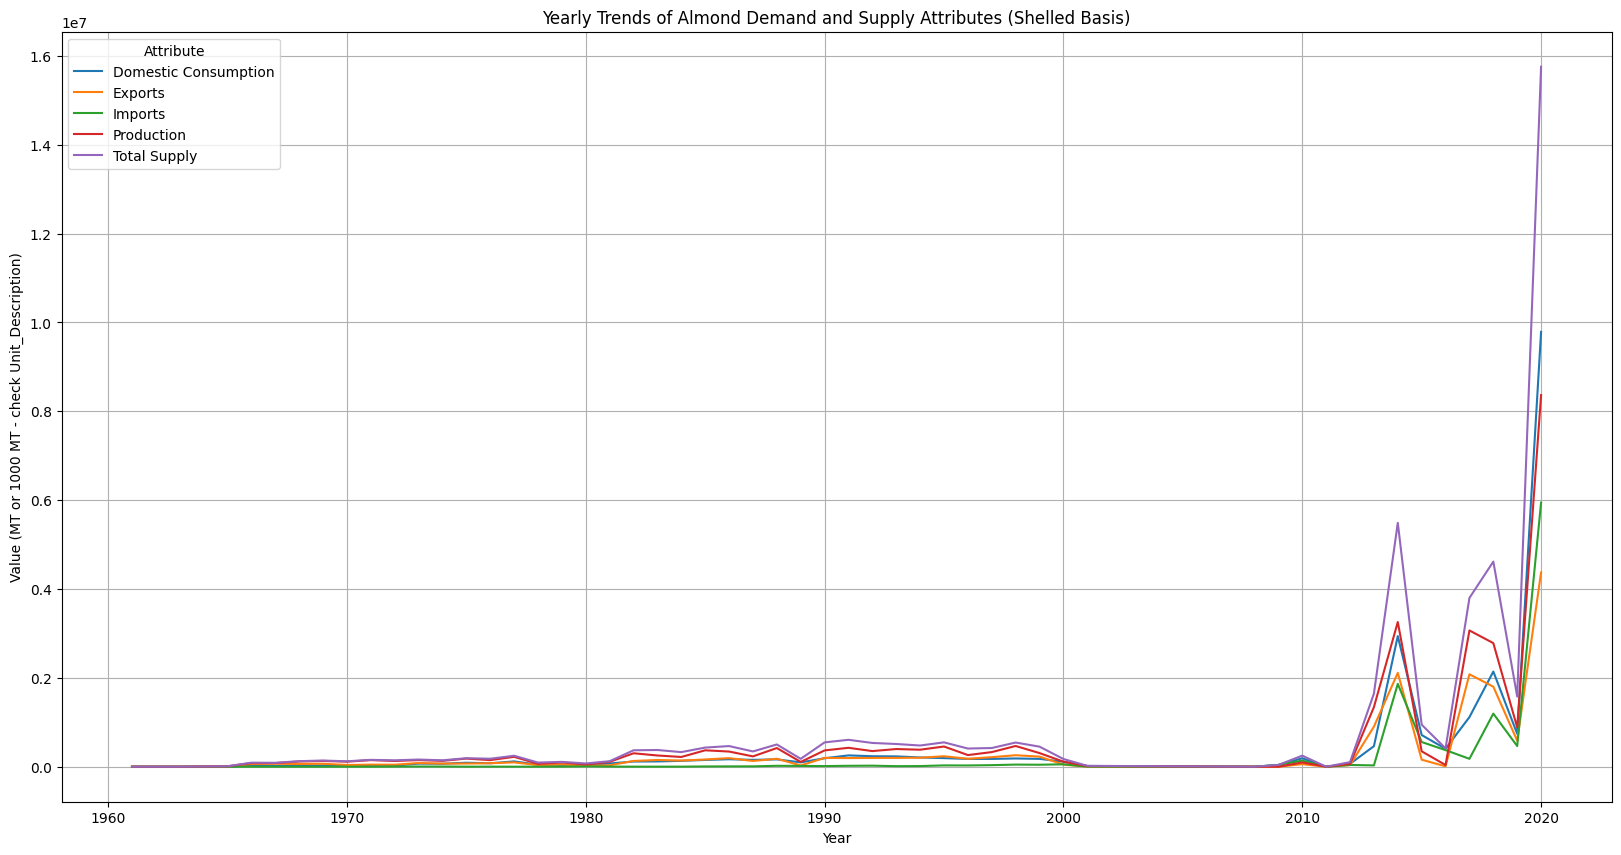

In [36]:
#plot time series fr each attribute
plt.figure(figsize=(20, 10))
sns.lineplot(data=almonds_yearly_trends, x='Calendar_Year', y='Value', hue='Attribute_Description')
plt.title('Yearly Trends of Almond Demand and Supply Attributes (Shelled Basis)')
plt.xlabel('Year')
plt.ylabel('Value (MT or 1000 MT - check Unit_Description)')
plt.grid(True)
plt.legend(title='Attribute')
plt.show()

In [37]:
#create a time index by combining the Calender_Year and Month columns
almonds_df['year_month'] = almonds_df['Calendar_Year'].astype(str) + '-' + almonds_df['Month'].astype(str) + '-01'


In [38]:
#convert the 'year_month' column to date-time objects
almonds_df['datetime'] = pd.to_datetime(almonds_df['year_month'], errors='coerce')

In [39]:
#Drop the middle Year_month column
almonds_df.drop('year_month', axis=1, inplace=True)

In [40]:
#set the 'date-time column as index
almonds_df.set_index('datetime', inplace=True)

In [41]:
#sort the index to ensure its in chronological order
almonds_df.sort_index(inplace=True)

In [43]:
#display the first few rows with the ne time index
print("DataFrame with Datetime Index:")
display(almonds_df.head(50))

DataFrame with Datetime Index:


,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
datetime,,,,,,,,,,,,
2008-11-01,577400,"Almonds, Shelled Basis",GR,Greece,2006,2008,11,28,Production,21,(MT),0.0
2008-11-01,577400,"Almonds, Shelled Basis",SP,Spain,2007,2008,11,57,Imports,21,(MT),0.0
2008-11-01,577400,"Almonds, Shelled Basis",IT,Italy,2007,2008,11,88,Exports,21,(MT),0.0
2008-11-01,577400,"Almonds, Shelled Basis",IT,Italy,2007,2008,11,57,Imports,21,(MT),0.0
2008-11-01,577400,"Almonds, Shelled Basis",IT,Italy,2007,2008,11,28,Production,21,(MT),0.0
2008-11-01,577400,"Almonds, Shelled Basis",IT,Italy,2007,2008,11,86,Total Supply,21,(MT),0.0
2008-11-01,577400,"Almonds, Shelled Basis",IT,Italy,2008,2008,11,125,Domestic Consumption,21,(MT),0.0
2008-11-01,577400,"Almonds, Shelled Basis",IT,Italy,2008,2008,11,88,Exports,21,(MT),0.0
2008-11-01,577400,"Almonds, Shelled Basis",IT,Italy,2008,2008,11,57,Imports,21,(MT),0.0


In [44]:
#check the index type
print("\nIndex type:")
display(almonds_df.index)


Index type:


DatetimeIndex(['2008-11-01', '2008-11-01', '2008-11-01', '2008-11-01',
               '2008-11-01', '2008-11-01', '2008-11-01', '2008-11-01',
               '2008-11-01', '2008-11-01',
               ...
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='datetime', length=4975, freq=None)

In [46]:
#we then deal with not time values as below
almonds_df.loc[almonds_df.index.dropna()]

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
datetime,,,,,,,,,,,,
2008-11-01,577400,"Almonds, Shelled Basis",GR,Greece,2006,2008,11,28,Production,21,(MT),0.0
2008-11-01,577400,"Almonds, Shelled Basis",SP,Spain,2007,2008,11,57,Imports,21,(MT),0.0
2008-11-01,577400,"Almonds, Shelled Basis",IT,Italy,2007,2008,11,88,Exports,21,(MT),0.0
2008-11-01,577400,"Almonds, Shelled Basis",IT,Italy,2007,2008,11,57,Imports,21,(MT),0.0
2008-11-01,577400,"Almonds, Shelled Basis",IT,Italy,2007,2008,11,28,Production,21,(MT),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,577400,"Almonds, Shelled Basis",KZ,Kazakhstan,2013,2020,10,57,Imports,21,(MT),2100.0
2020-10-01,577400,"Almonds, Shelled Basis",KZ,Kazakhstan,2013,2020,10,88,Exports,21,(MT),0.0
2020-10-01,577400,"Almonds, Shelled Basis",KZ,Kazakhstan,2013,2020,10,125,Domestic Consumption,21,(MT),2100.0


In [47]:
#next we reshape the Data frame using pivot table
# to spcify whats happening is that index will be the date-time, column will be the attributes, values will be the 'value')
almonds_time_series = almonds_df.pivot_table(index=almonds_df.index, columns='Attribute_Description', values='Value')
# then we display the first few rows of the reshaped Dataframe
print("Reshaped DataFrame (Time Series):")
display(almonds_time_series.head())

Reshaped DataFrame (Time Series):


Attribute_Description,Domestic Consumption,Exports,Imports,Production,Total Supply
datetime,,,,,
2008-11-01,0.000000,0.000000,0.000000,0.000000,0.000000
2009-08-01,1538.461538,0.000000,1538.461538,0.000000,1538.461538
2010-10-01,5016.394737,1515.789474,3623.684211,2539.473684,6561.131579
2011-10-01,0.000000,0.000000,0.000000,0.000000,0.000000
2012-10-01,2712.500000,1545.833333,1658.333333,2600.000000,4300.000000


In [48]:
#then check the shape of the reshaped data frame
print("\nShape of the reshaped DataFrame:")
display(almonds_time_series.shape)


Shape of the reshaped DataFrame:


(17, 5)

In [49]:
#check the frequency of the tie series index
print("\nFrequency of the time series index:")
display(almonds_time_series.index.freq)


Frequency of the time series index:


None

In [50]:
#if the frequency is none, we can check for missing periods by looking for gaps
#we can also create a complete data range and see wgich dates from the complete range are not in our index
if almonds_time_series.index.freq is None:
    print("\nIndex does not have a fixed frequency. Checking for missing periods...")


Index does not have a fixed frequency. Checking for missing periods...


In [54]:
# we then determine the minimum and maximum dates on the index
min_date = almonds_time_series.index.min()
max_date = almonds_time_series.index.max()
#create a complete monthly date range from minimum to maximum data
full_date_range = pd.date_range(start=min_date, end=max_date, freq='MS') #please note that MS means month start
#find the dates the full range that are not in the actual index
missing_dates = full_date_range.difference(almonds_time_series.index)
print(f"\nNumber of missing time periods (months) in the index: {len(missing_dates)}")
if len(missing_dates) > 0:
    print("Missing time periods:")
    display(missing_dates)

else:
        print("\nIndex has a fixed frequency.")



Number of missing time periods (months) in the index: 127
Missing time periods:


DatetimeIndex(['2008-12-01', '2009-01-01', '2009-02-01', '2009-03-01',
               '2009-04-01', '2009-05-01', '2009-06-01', '2009-07-01',
               '2009-09-01', '2009-10-01',
               ...
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', length=127, freq=None)

In [55]:
from statsmodels.tsa.stattools import adfuller
#we will use the adfuller function from the statsmodels library for this,
#if p-value <=0.05 siggests that we can reject the null hypothesis of non null stationarity, including the series is likely stationary.
#perform ADF test on each column
print("Augmented Dickey-Fuller Test Results:")
for column in almonds_time_series.columns:
    print(f"\nAttribute: {column}")
    # Drop any potential NaN values for the test
    series = almonds_time_series[column].dropna()
    if len(series) > 0:
        try:
            result = adfuller(series)
            print(f'ADF Statistic: {result[0]}')
            print(f'p-value: {result[1]}')
            print('Critical Values:')
            for key, value in result[4].items():
                print(f'\t{key}: {value}')
            if result[1] <= 0.05:
                print("Result: Likely Stationary")
            else:
                print("Result: Likely Non-Stationary")
        except Exception as e:
            print(f"Could not perform ADF test: {e}")
    else:
        print("Series is empty after dropping NaNs, cannot perform ADF test.")


Augmented Dickey-Fuller Test Results:

Attribute: Domestic Consumption
ADF Statistic: -0.3494222811135275
p-value: 0.9182071357506685
Critical Values:
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487
Result: Likely Non-Stationary

Attribute: Exports
ADF Statistic: -1.4056190901439598
p-value: 0.5795793110330493
Critical Values:
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487
Result: Likely Non-Stationary

Attribute: Imports
ADF Statistic: -0.9771866158717875
p-value: 0.7614937625677927
Critical Values:
	1%: -4.137829282407408
	5%: -3.1549724074074077
	10%: -2.7144769444444443
Result: Likely Non-Stationary

Attribute: Production
ADF Statistic: -1.3906810196452444
p-value: 0.586735510921512
Critical Values:
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487
Result: Likely Non-Stationary

Attribute: Total Supply
ADF Statistic: -17.15156835095335
p-value: 6.936701898861303e-30
Critical Values:
	1%: -4.223238279489106
	5%: -3.189368925619835
	10%: -2.729839421487603
Result: Likely Stationary


In [57]:
#since we have so many non stationary figures,
#we apply first-order differencing to the non statinary series
almonds_time_series_diff = almonds_time_series[['Domestic Consumption', 'Exports', 'Imports', 'Production']].diff().dropna()
#display the first few rows of the differenced data frame
print("Differenced DataFrame (First Order):")
display(almonds_time_series_diff.head())

Differenced DataFrame (First Order):


Attribute_Description,Domestic Consumption,Exports,Imports,Production
datetime,,,,
2009-08-01,1538.461538,0.000000,1538.461538,0.000000
2010-10-01,3477.933198,1515.789474,2085.222672,2539.473684
2011-10-01,-5016.394737,-1515.789474,-3623.684211,-2539.473684
2012-10-01,2712.500000,1545.833333,1658.333333,2600.000000
2013-10-01,-2212.500000,-1545.833333,-1158.333333,-2600.000000


In [59]:
# we then perform ADF test on the differenced series
print("\nAugmented Dickey-Fuller Test Results after First-Order Differencing:")
for column in almonds_time_series_diff.columns:
    print(f"\nAttribute: {column} (Differenced)")
    series = almonds_time_series_diff[column].dropna() # Drop Na
    if len(series) > 0:
        try:
            result = adfuller(series) # Corrected line here
            print(f'ADF Statistic: {result[0]}')
            print(f'p-value: {result[1]}')
            print('Critical Values:')
            for key, value in result[4].items():
                print(f'\t{key}: {value}')
            if result[1] <= 0.05:
                print("Result: Likely Stationary")
            else:
                print("Result: Likely Non-Stationary")
        except Exception as e:
            print(f"Could not perform ADF test: {e}")
    else:
        print("Series is empty after dropping NaNs, cannot perform ADF test.")


Augmented Dickey-Fuller Test Results after First-Order Differencing:

Attribute: Domestic Consumption (Differenced)
ADF Statistic: -2.2750369266924815
p-value: 0.1801454831517555
Critical Values:
	1%: -4.473135048010974
	5%: -3.28988060356653
	10%: -2.7723823456790124
Result: Likely Non-Stationary

Attribute: Exports (Differenced)
ADF Statistic: -17.487963501515107
p-value: 4.452772222846739e-30
Critical Values:
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487
Result: Likely Stationary

Attribute: Imports (Differenced)
ADF Statistic: -3.5889831609103746
p-value: 0.00597517277847742
Critical Values:
	1%: -4.473135048010974
	5%: -3.28988060356653
	10%: -2.7723823456790124
Result: Likely Stationary

Attribute: Production (Differenced)
ADF Statistic: -16.847805633209227
p-value: 1.1248674338677861e-29
Critical Values:
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487
Result: Likely Stationary


In [60]:
# Apply second-order differencing to 'Domestic Consumption'
domestic_consumption_diff2 = almonds_time_series['Domestic Consumption'].diff().diff().dropna()

# Display the first few values of the second-differenced series
print("Second-Differenced 'Domestic Consumption':")
display(domestic_consumption_diff2.head())

# Perform ADF test on the second-differenced 'Domestic Consumption' series
print("\nAugmented Dickey-Fuller Test Results after Second-Order Differencing for 'Domestic Consumption':")
series = domestic_consumption_diff2.dropna()
if len(series) > 0:
    try:
        result = adfuller(series)
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print('Critical Values:')
        for key, value in result[4].items():
            print(f'\t{key}: {value}')
        if result[1] <= 0.05:
            print("Result: Likely Stationary")
        else:
            print("Result: Likely Non-Stationary")
    except Exception as e:
        print(f"Could not perform ADF test: {e}")
else:
    print("Series is empty after dropping NaNs, cannot perform ADF test.")

# Update the almonds_time_series_diff DataFrame to include the second-differenced series
# We'll combine the second-differenced 'Domestic Consumption' with the first-differenced series
almonds_time_series_diff['Domestic Consumption'] = domestic_consumption_diff2
almonds_time_series_diff.dropna(inplace=True) # Drop rows with NaNs introduced by differencing

print("\nUpdated Differenced DataFrame (almonds_time_series_diff):")
display(almonds_time_series_diff.head())

Second-Differenced 'Domestic Consumption':


,Domestic Consumption
datetime,
2010-10-01,1939.471660
2011-10-01,-8494.327935
2012-10-01,7728.894737
2013-10-01,-4925.000000
2013-11-01,78213.000000



Augmented Dickey-Fuller Test Results after Second-Order Differencing for 'Domestic Consumption':
ADF Statistic: -2.5173161261680685
p-value: 0.11131777007996752
Critical Values:
	1%: -4.473135048010974
	5%: -3.28988060356653
	10%: -2.7723823456790124
Result: Likely Non-Stationary

Updated Differenced DataFrame (almonds_time_series_diff):


Attribute_Description,Domestic Consumption,Exports,Imports,Production
datetime,,,,
2010-10-01,1939.471660,1515.789474,2085.222672,2539.473684
2011-10-01,-8494.327935,-1515.789474,-3623.684211,-2539.473684
2012-10-01,7728.894737,1545.833333,1658.333333,2600.000000
2013-10-01,-4925.000000,-1545.833333,-1158.333333,-2600.000000
2013-11-01,78213.000000,150250.666667,3988.500000,223463.666667


Not enough data points (17) for reliable seasonal decomposition with a period of 12 (monthly).
Visual inspection of the time series plot might still reveal patterns.


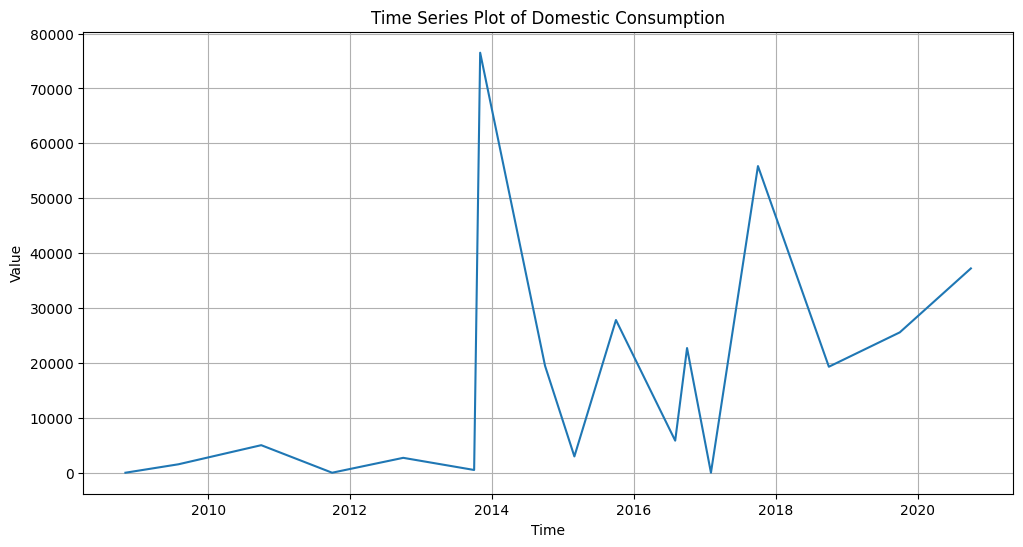

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Select the 'Domestic Consumption' series
domestic_consumption_series = almonds_time_series['Domestic Consumption'].dropna()

# Check if the series has enough data points and a frequency for decomposition
# We need at least two full periods for additive decomposition, more for multiplicative
# Let's assume a monthly frequency for potential seasonality (period=12)
# The series has 17 data points, which might be too few for reliable decomposition with period=12.
# However, let's attempt it to see if any pattern emerges.

if len(domestic_consumption_series) >= 2 * 12: # Check if enough data for monthly seasonality
    print("Performing seasonal decomposition for 'Domestic Consumption'...")
    try:
        # Perform additive decomposition
        decomposition = seasonal_decompose(domestic_consumption_series, model='additive', period=12)

        # Plot the decomposed components
        fig = decomposition.plot()
        fig.set_size_inches(10, 8)
        plt.suptitle('Seasonal Decomposition of Domestic Consumption (Additive Model, Period=12)', y=1.02)
        plt.show()

        # Alternatively, perform multiplicative decomposition if values are always positive
        # decomposition = seasonal_decompose(domestic_consumption_series, model='multiplicative', period=12)
        # fig = decomposition.plot()
        # fig.set_size_inches(10, 8)
        # plt.suptitle('Seasonal Decomposition of Domestic Consumption (Multiplicative Model, Period=12)', y=1.02)
        # plt.show()

    except Exception as e:
        print(f"Could not perform seasonal decomposition: {e}")
        print("Insufficient data points or issues with frequency for decomposition.")

else:
    print(f"Not enough data points ({len(domestic_consumption_series)}) for reliable seasonal decomposition with a period of 12 (monthly).")
    print("Visual inspection of the time series plot might still reveal patterns.")

# Also, plot the 'Domestic Consumption' series again for visual inspection
plt.figure(figsize=(12, 6))
plt.plot(domestic_consumption_series)
plt.title('Time Series Plot of Domestic Consumption')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [62]:
# Create lag features for each attribute
for attribute in almonds_time_series.columns:
    almonds_time_series[f'{attribute}_Lag1'] = almonds_time_series[attribute].shift(1)
    almonds_time_series[f'{attribute}_Lag2'] = almonds_time_series[attribute].shift(2)
    almonds_time_series[f'{attribute}_Lag3'] = almonds_time_series[attribute].shift(3)
    # Add more lags if desired

# Display the first few rows with the new lag features
print("DataFrame with Lag Features:")
display(almonds_time_series.head())

# Note: Introducing lags will create NaN values at the beginning of the DataFrame
# These will need to be handled before modeling (e.g., dropping rows with NaNs)

DataFrame with Lag Features:


Attribute_Description,Domestic Consumption,Exports,Imports,Production,Total Supply,Domestic Consumption_Lag1,Domestic Consumption_Lag2,Domestic Consumption_Lag3,Exports_Lag1,Exports_Lag2,Exports_Lag3,Imports_Lag1,Imports_Lag2,Imports_Lag3,Production_Lag1,Production_Lag2,Production_Lag3,Total Supply_Lag1,Total Supply_Lag2,Total Supply_Lag3
datetime,,,,,,,,,,,,,,,,,,,,
2008-11-01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-01,1538.461538,0.000000,1538.461538,0.000000,1538.461538,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
2010-10-01,5016.394737,1515.789474,3623.684211,2539.473684,6561.131579,1538.461538,0.000000,NaN,0.000000,0.000000,NaN,1538.461538,0.000000,NaN,0.000000,0.000000,NaN,1538.461538,0.000000,NaN
2011-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,5016.394737,1538.461538,0.000000,1515.789474,0.000000,0.0,3623.684211,1538.461538,0.000000,2539.473684,0.000000,0.0,6561.131579,1538.461538,0.000000
2012-10-01,2712.500000,1545.833333,1658.333333,2600.000000,4300.000000,0.000000,5016.394737,1538.461538,0.000000,1515.789474,0.0,0.000000,3623.684211,1538.461538,0.000000,2539.473684,0.0,0.000000,6561.131579,1538.461538


In [63]:
#drop rows ith NaN vlaues which came up as na introduction of lags
almonds_time_series_cleaned = almonds_time_series.dropna()

print("DataFrame after dropping NaNs:")
display(almonds_time_series_cleaned.head())
print("\nShape after dropping NaNs:")
display(almonds_time_series_cleaned.shape)

DataFrame after dropping NaNs:


Attribute_Description,Domestic Consumption,Exports,Imports,Production,Total Supply,Domestic Consumption_Lag1,Domestic Consumption_Lag2,Domestic Consumption_Lag3,Exports_Lag1,Exports_Lag2,Exports_Lag3,Imports_Lag1,Imports_Lag2,Imports_Lag3,Production_Lag1,Production_Lag2,Production_Lag3,Total Supply_Lag1,Total Supply_Lag2,Total Supply_Lag3
datetime,,,,,,,,,,,,,,,,,,,,
2011-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,5016.394737,1538.461538,0.000000,1515.789474,0.000000,0.000000,3623.684211,1538.461538,0.000000,2539.473684,0.000000,0.000000,6561.131579,1538.461538,0.000000
2012-10-01,2712.500000,1545.833333,1658.333333,2600.000000,4300.000000,0.000000,5016.394737,1538.461538,0.000000,1515.789474,0.000000,0.000000,3623.684211,1538.461538,0.000000,2539.473684,0.000000,0.000000,6561.131579,1538.461538
2013-10-01,500.000000,0.000000,500.000000,0.000000,500.000000,2712.500000,0.000000,5016.394737,1545.833333,0.000000,1515.789474,1658.333333,0.000000,3623.684211,2600.000000,0.000000,2539.473684,4300.000000,0.000000,6561.131579
2013-11-01,76500.500000,150250.666667,4488.500000,223463.666667,273710.666667,500.000000,2712.500000,0.000000,0.000000,1545.833333,0.000000,500.000000,1658.333333,0.000000,0.000000,2600.000000,0.000000,500.000000,4300.000000,0.000000
2014-10-01,19473.741722,13988.403974,12349.417219,21571.291391,36357.662252,76500.500000,500.000000,2712.500000,150250.666667,0.000000,1545.833333,4488.500000,500.000000,1658.333333,223463.666667,0.000000,2600.000000,273710.666667,500.000000,4300.000000



Shape after dropping NaNs:


(14, 20)

In [65]:
#drop rows ith NaN vlaues which came up as na introduction of lags
almonds_time_series_cleaned = almonds_time_series.dropna()

print("DataFrame after dropping NaNs:")
display(almonds_time_series_cleaned.head())
print("\nShape after dropping NaNs:")
display(almonds_time_series_cleaned.shape)

#we then define the target variable(eg, 'Domestic Cosumption','Exports','Imports,'Prodction','Total supply')
# we can choose a target variable  for example domestic consumption'
target_variable = 'Domestic Consumption'

#define features (all columns except the target variable itself)
features = [col for col in almonds_time_series_cleaned.columns if col != target_variable]
x=almonds_time_series_cleaned[features]
y=almonds_time_series_cleaned[target_variable]

# we wil use date based split since we have only 14 data ponts after dropping NaNs
split_date = '2017-10-01'

# we then split the data chronologically or orderly
X_train = x[x.index < split_date]
y_train = y[y.index < split_date]
X_test = x[x.index >= split_date]
y_test = y[y.index >= split_date]

print(f"\nData split chronologically at {split_date}:")
print(f"Training set shape (X_train): {X_train.shape}, (y_train): {y_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}, (y_test): {y_test.shape}")

# We the display the first few rows for training and testing
print("\nTraining set (first 5 rows):")
display(X_train.head())
display(y_train.head())

print("\nTesting set (first 5 rows):")
display(X_test.head())
display(y_test.head())

DataFrame after dropping NaNs:


Attribute_Description,Domestic Consumption,Exports,Imports,Production,Total Supply,Domestic Consumption_Lag1,Domestic Consumption_Lag2,Domestic Consumption_Lag3,Exports_Lag1,Exports_Lag2,Exports_Lag3,Imports_Lag1,Imports_Lag2,Imports_Lag3,Production_Lag1,Production_Lag2,Production_Lag3,Total Supply_Lag1,Total Supply_Lag2,Total Supply_Lag3
datetime,,,,,,,,,,,,,,,,,,,,
2011-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,5016.394737,1538.461538,0.000000,1515.789474,0.000000,0.000000,3623.684211,1538.461538,0.000000,2539.473684,0.000000,0.000000,6561.131579,1538.461538,0.000000
2012-10-01,2712.500000,1545.833333,1658.333333,2600.000000,4300.000000,0.000000,5016.394737,1538.461538,0.000000,1515.789474,0.000000,0.000000,3623.684211,1538.461538,0.000000,2539.473684,0.000000,0.000000,6561.131579,1538.461538
2013-10-01,500.000000,0.000000,500.000000,0.000000,500.000000,2712.500000,0.000000,5016.394737,1545.833333,0.000000,1515.789474,1658.333333,0.000000,3623.684211,2600.000000,0.000000,2539.473684,4300.000000,0.000000,6561.131579
2013-11-01,76500.500000,150250.666667,4488.500000,223463.666667,273710.666667,500.000000,2712.500000,0.000000,0.000000,1545.833333,0.000000,500.000000,1658.333333,0.000000,0.000000,2600.000000,0.000000,500.000000,4300.000000,0.000000
2014-10-01,19473.741722,13988.403974,12349.417219,21571.291391,36357.662252,76500.500000,500.000000,2712.500000,150250.666667,0.000000,1545.833333,4488.500000,500.000000,1658.333333,223463.666667,0.000000,2600.000000,273710.666667,500.000000,4300.000000



Shape after dropping NaNs:


(14, 20)


Data split chronologically at 2017-10-01:
Training set shape (X_train): (10, 19), (y_train): (10,)
Testing set shape (X_test): (4, 19), (y_test): (4,)

Training set (first 5 rows):


Attribute_Description,Exports,Imports,Production,Total Supply,Domestic Consumption_Lag1,Domestic Consumption_Lag2,Domestic Consumption_Lag3,Exports_Lag1,Exports_Lag2,Exports_Lag3,Imports_Lag1,Imports_Lag2,Imports_Lag3,Production_Lag1,Production_Lag2,Production_Lag3,Total Supply_Lag1,Total Supply_Lag2,Total Supply_Lag3
datetime,,,,,,,,,,,,,,,,,,,
2011-10-01,0.000000,0.000000,0.000000,0.000000,5016.394737,1538.461538,0.000000,1515.789474,0.000000,0.000000,3623.684211,1538.461538,0.000000,2539.473684,0.000000,0.000000,6561.131579,1538.461538,0.000000
2012-10-01,1545.833333,1658.333333,2600.000000,4300.000000,0.000000,5016.394737,1538.461538,0.000000,1515.789474,0.000000,0.000000,3623.684211,1538.461538,0.000000,2539.473684,0.000000,0.000000,6561.131579,1538.461538
2013-10-01,0.000000,500.000000,0.000000,500.000000,2712.500000,0.000000,5016.394737,1545.833333,0.000000,1515.789474,1658.333333,0.000000,3623.684211,2600.000000,0.000000,2539.473684,4300.000000,0.000000,6561.131579
2013-11-01,150250.666667,4488.500000,223463.666667,273710.666667,500.000000,2712.500000,0.000000,0.000000,1545.833333,0.000000,500.000000,1658.333333,0.000000,0.000000,2600.000000,0.000000,500.000000,4300.000000,0.000000
2014-10-01,13988.403974,12349.417219,21571.291391,36357.662252,76500.500000,500.000000,2712.500000,150250.666667,0.000000,1545.833333,4488.500000,500.000000,1658.333333,223463.666667,0.000000,2600.000000,273710.666667,500.000000,4300.000000


,Domestic Consumption
datetime,
2011-10-01,0.000000
2012-10-01,2712.500000
2013-10-01,500.000000
2013-11-01,76500.500000
2014-10-01,19473.741722



Testing set (first 5 rows):


Attribute_Description,Exports,Imports,Production,Total Supply,Domestic Consumption_Lag1,Domestic Consumption_Lag2,Domestic Consumption_Lag3,Exports_Lag1,Exports_Lag2,Exports_Lag3,Imports_Lag1,Imports_Lag2,Imports_Lag3,Production_Lag1,Production_Lag2,Production_Lag3,Total Supply_Lag1,Total Supply_Lag2,Total Supply_Lag3
datetime,,,,,,,,,,,,,,,,,,,
2017-10-01,104038.700000,8888.300000,153365.250000,189965.000000,0.000000,22706.250000,5842.857143,0.000000,500.000000,0.0,0.000000,20806.250000,5842.857143,0.000000,2400.000000,0.00,0.000000,23237.500000,5842.857143
2018-10-01,16232.414414,10770.531532,25066.036036,41597.495495,55854.350000,0.000000,22706.250000,104038.700000,0.000000,500.0,8888.300000,0.000000,20806.250000,153365.250000,0.000000,2400.00,189965.000000,0.000000,23237.500000
2019-10-01,20187.137931,16031.482759,30528.620690,54485.241379,19302.621622,55854.350000,0.000000,16232.414414,104038.700000,0.0,10770.531532,8888.300000,0.000000,25066.036036,153365.250000,0.00,41597.495495,189965.000000,0.000000
2020-10-01,16631.760456,22605.870722,31811.292776,59911.129278,25564.275862,19302.621622,55854.350000,20187.137931,16232.414414,104038.7,16031.482759,10770.531532,8888.300000,30528.620690,25066.036036,153365.25,54485.241379,41597.495495,189965.000000


,Domestic Consumption
datetime,
2017-10-01,55854.350000
2018-10-01,19302.621622
2019-10-01,25564.275862
2020-10-01,37212.927757


In [71]:
# to start our linear model
model=LinearRegression()
# we then train te model on the training data
model.fit(X_train,y_train)
#make predictions on testing data
y_pred=model.predict(X_test)
#then evaluate the model"s performace
mae=mean_absolute_error(y_test,y_pred)
# Calculate MSE first, then take the square root for RMSE
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse) # Corrected line for RMSE
r2=r2_score(y_test,y_pred)

In [72]:
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 1718.8543014839288
Root Mean Squared Error (RMSE): 2149.2068822877186
R-squared (R2): 0.9761341174197538


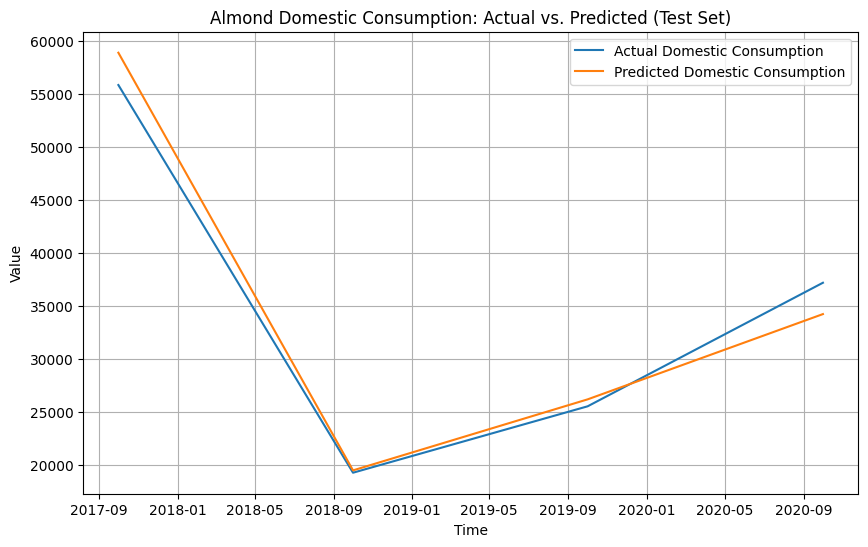

In [73]:
# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual Domestic Consumption')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted Domestic Consumption')
plt.title('Almond Domestic Consumption: Actual vs. Predicted (Test Set)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()